In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load vaccination data using relative path (no /mnt/data/)
vacc_df = pd.read_csv('country_vaccinations.csv')
manuf_df = pd.read_csv('country_vaccinations_by_manufacturer.csv')

# Quick check
vacc_df.head()
manuf_df.head()


,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [7]:
# Filter for Malaysia
malaysia_vacc = vacc_df[vacc_df['country'] == 'Malaysia']

# Convert date column to datetime
malaysia_vacc['date'] = pd.to_datetime(malaysia_vacc['date'])

# Sort by date
malaysia_vacc = malaysia_vacc.sort_values('date')

malaysia_vacc.tail()



/tmp/ipython-input-7-663345310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_vacc['date'] = pd.to_datetime(malaysia_vacc['date'])


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
47906,Malaysia,MYS,2022-03-25,68647915.0,27463766.0,25796241.0,33923.0,30560.0,209.44,83.79,78.70,932.0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Malaysia,https://github.com/MoH-Malaysia/covid19-public
47907,Malaysia,MYS,2022-03-26,68680477.0,27477329.0,25797278.0,32562.0,30087.0,209.54,83.83,78.71,918.0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Malaysia,https://github.com/MoH-Malaysia/covid19-public
47908,Malaysia,MYS,2022-03-27,68705384.0,27484120.0,25798167.0,24907.0,29637.0,209.62,83.85,78.71,904.0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Malaysia,https://github.com/MoH-Malaysia/covid19-public
47909,Malaysia,MYS,2022-03-28,68747449.0,27488817.0,25799967.0,42065.0,31467.0,209.75,83.87,78.72,960.0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Malaysia,https://github.com/MoH-Malaysia/covid19-public
47910,Malaysia,MYS,2022-03-29,68795057.0,27494218.0,25801561.0,47608.0,34094.0,209.89,83.88,78.72,1040.0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Malaysia,https://github.com/MoH-Malaysia/covid19-public


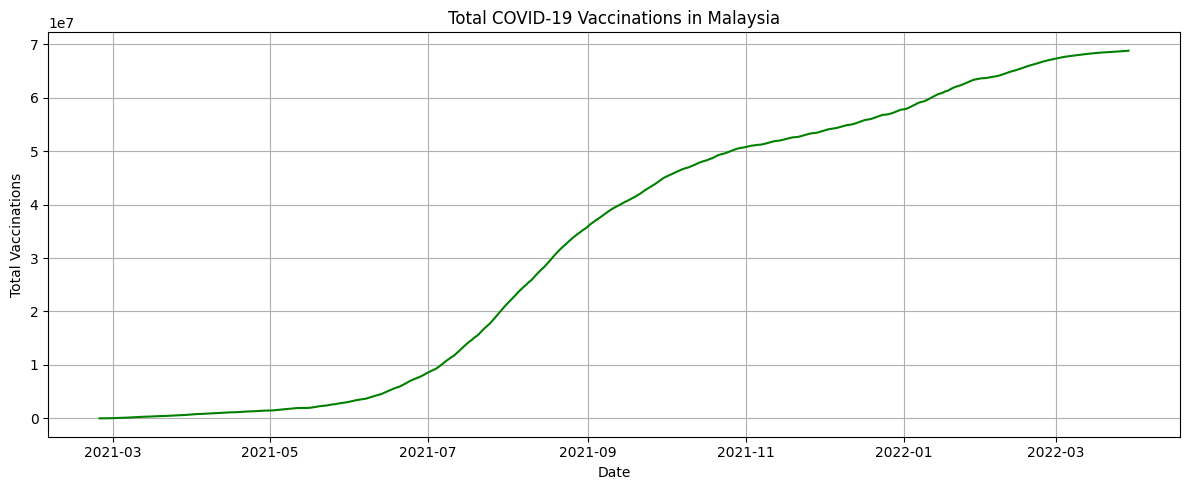

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(malaysia_vacc['date'], malaysia_vacc['total_vaccinations'], color='green')
plt.title('Total COVID-19 Vaccinations in Malaysia')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-4034485475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df['date'] = pd.to_datetime(compare_df['date'])


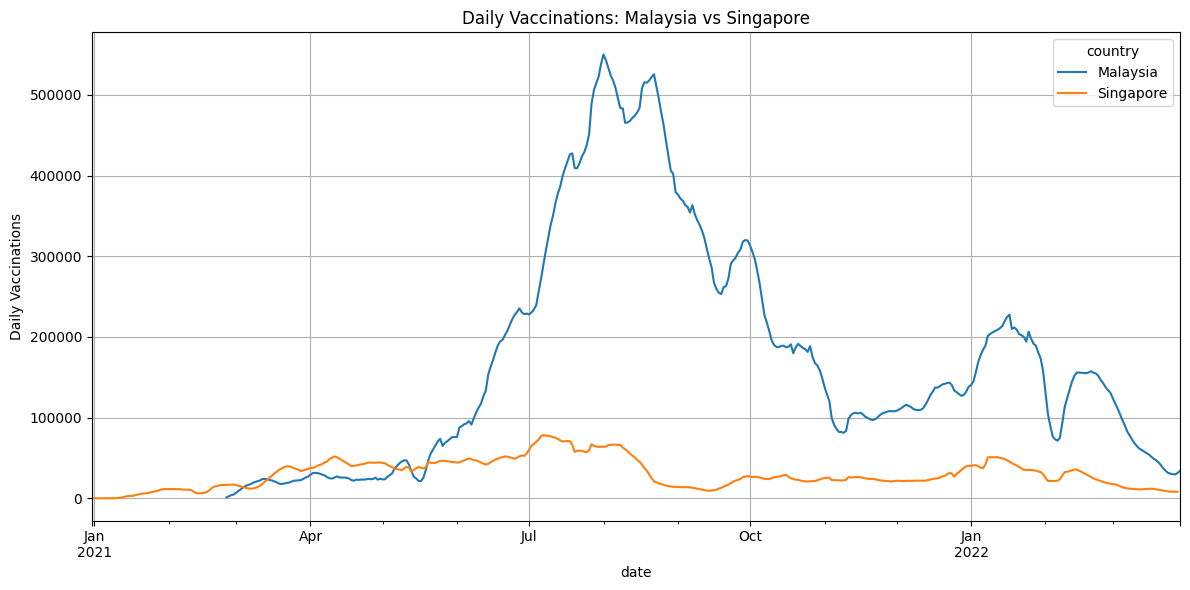

In [9]:
# Compare Malaysia and Singapore
compare_df = vacc_df[vacc_df['country'].isin(['Malaysia', 'Singapore'])]
compare_df['date'] = pd.to_datetime(compare_df['date'])

pivot = compare_df.pivot_table(values='daily_vaccinations', index='date', columns='country')
pivot.plot(figsize=(12, 6), title='Daily Vaccinations: Malaysia vs Singapore')
plt.ylabel('Daily Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1278290341.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='total_vaccinations', y='country', palette='viridis')


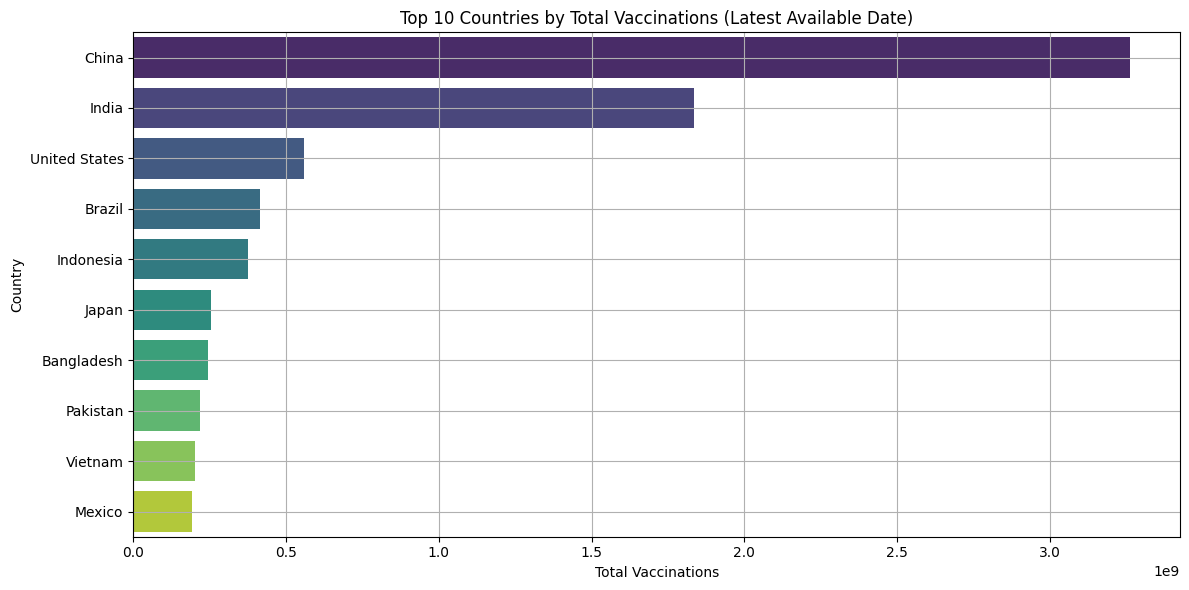

In [12]:
# Get the latest date for each country
latest_vacc = vacc_df.sort_values('date').drop_duplicates('country', keep='last')

# Sort and plot top 10 countries
top10 = latest_vacc.sort_values(by='total_vaccinations', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='total_vaccinations', y='country', palette='viridis')
plt.title('Top 10 Countries by Total Vaccinations (Latest Available Date)')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipython-input-13-2745625487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_vacc['date'] = pd.to_datetime(malaysia_vacc['date'])


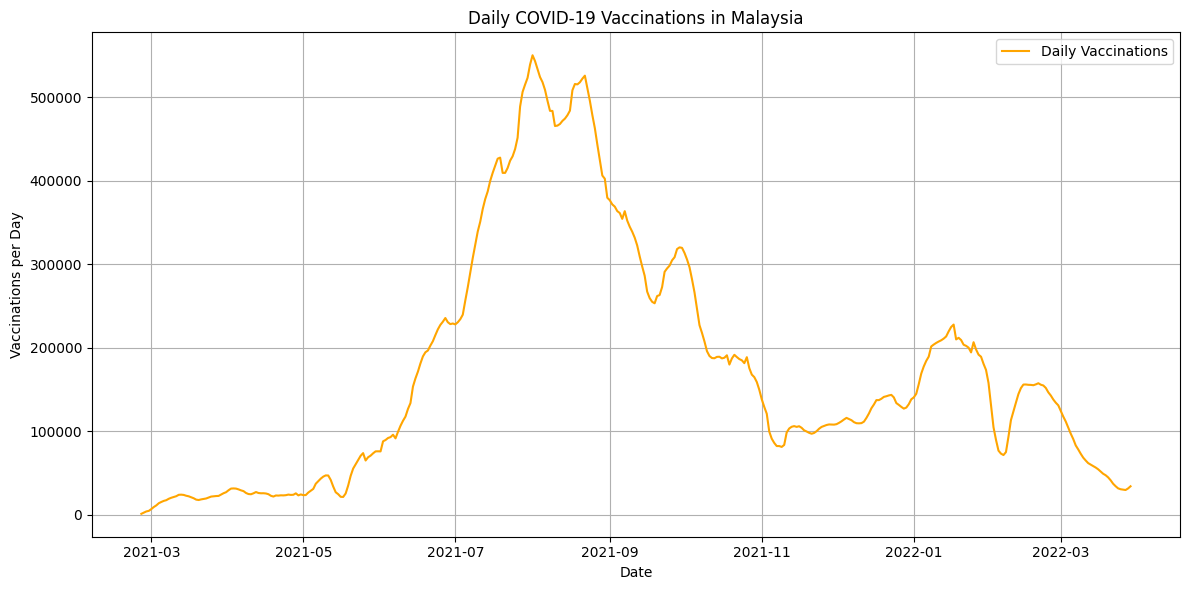

In [13]:
malaysia_vacc = vacc_df[vacc_df['country'] == 'Malaysia']
malaysia_vacc['date'] = pd.to_datetime(malaysia_vacc['date'])

plt.figure(figsize=(12,6))
plt.plot(malaysia_vacc['date'], malaysia_vacc['daily_vaccinations'], label='Daily Vaccinations', color='orange')
plt.title('Daily COVID-19 Vaccinations in Malaysia')
plt.xlabel('Date')
plt.ylabel('Vaccinations per Day')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


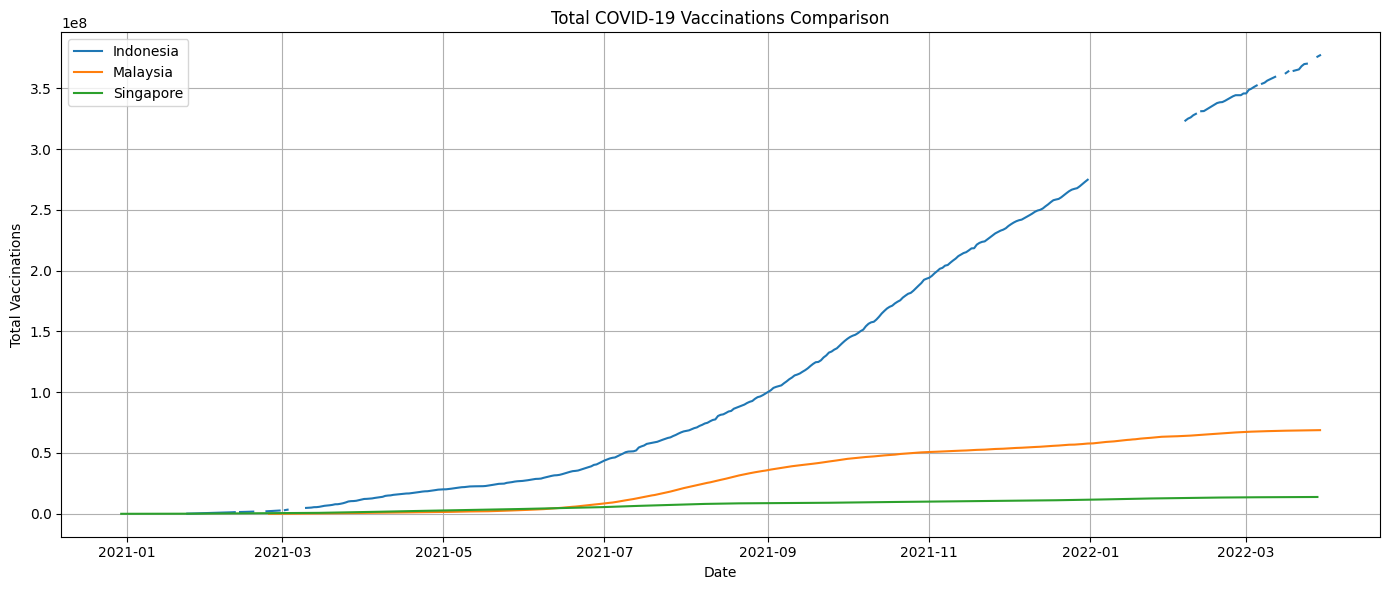

In [16]:
compare = vacc_df[vacc_df['country'].isin(['Malaysia', 'Indonesia', 'Singapore'])].copy()
compare['date'] = pd.to_datetime(compare['date'])

plt.figure(figsize=(14,6))
for country in compare['country'].unique():
    subset = compare[compare['country'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Comparison')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
